c:\Users\moussaab\anaconda3\envs\pythonProject\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[*********************100%%**********************]  1 of 1 completed


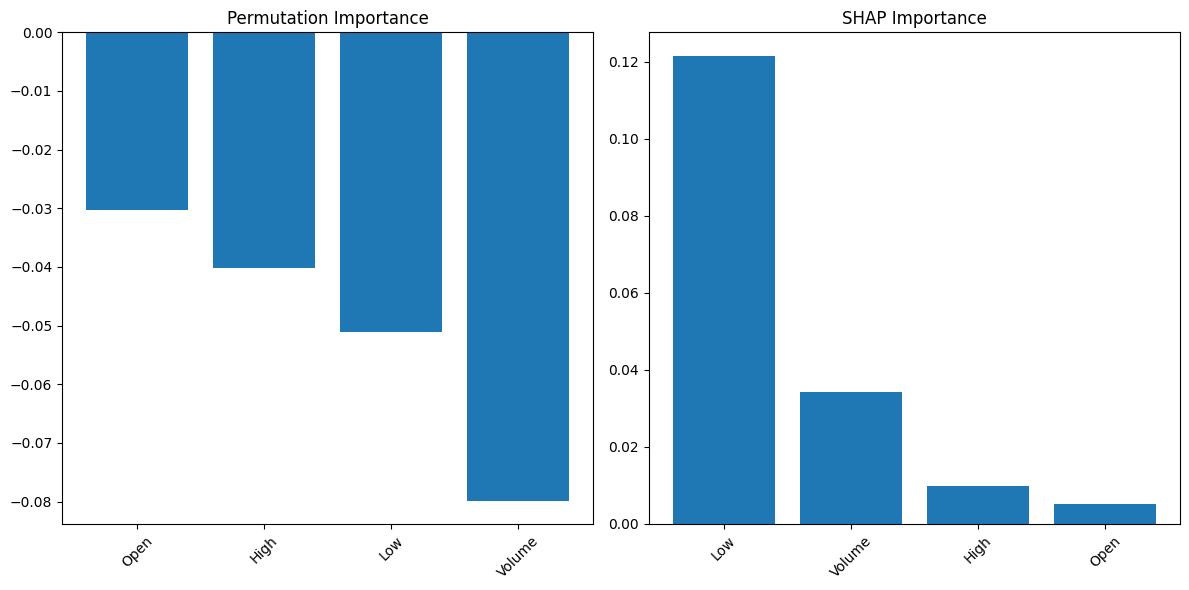

Linear Regression:
  MSE: 0.3897
  R2: -18.7173
Decision Tree:
  MSE: 0.0352
  R2: -0.7810
Random Forest:
  MSE: 0.0304
  R2: -0.5391
XGBoost:
  MSE: 0.0289
  R2: -0.4639


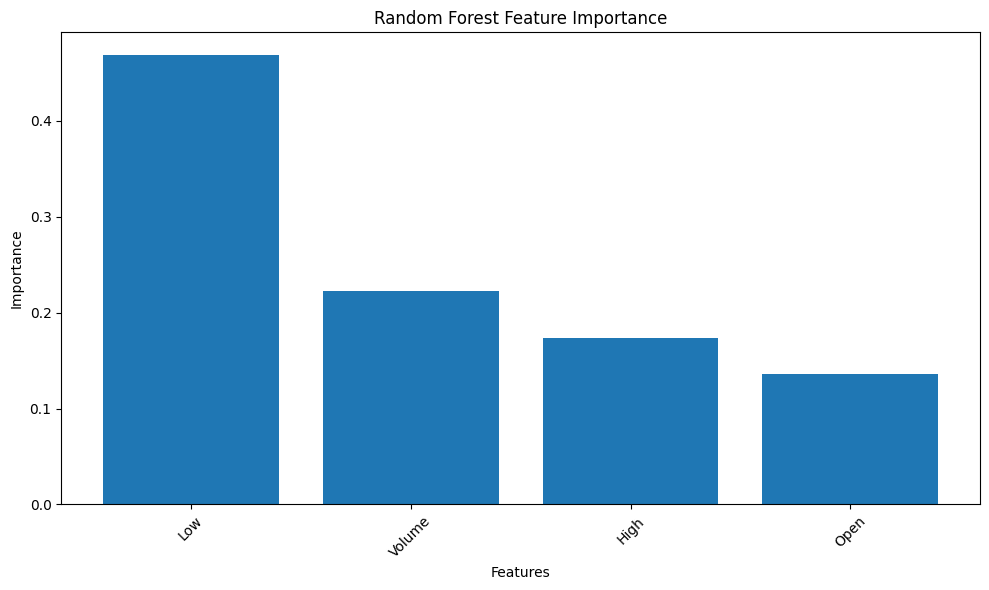

Random Forest Feature Importance:
  feature  importance
2     Low    0.468869
3  Volume    0.222111
1    High    0.173176
0    Open    0.135844


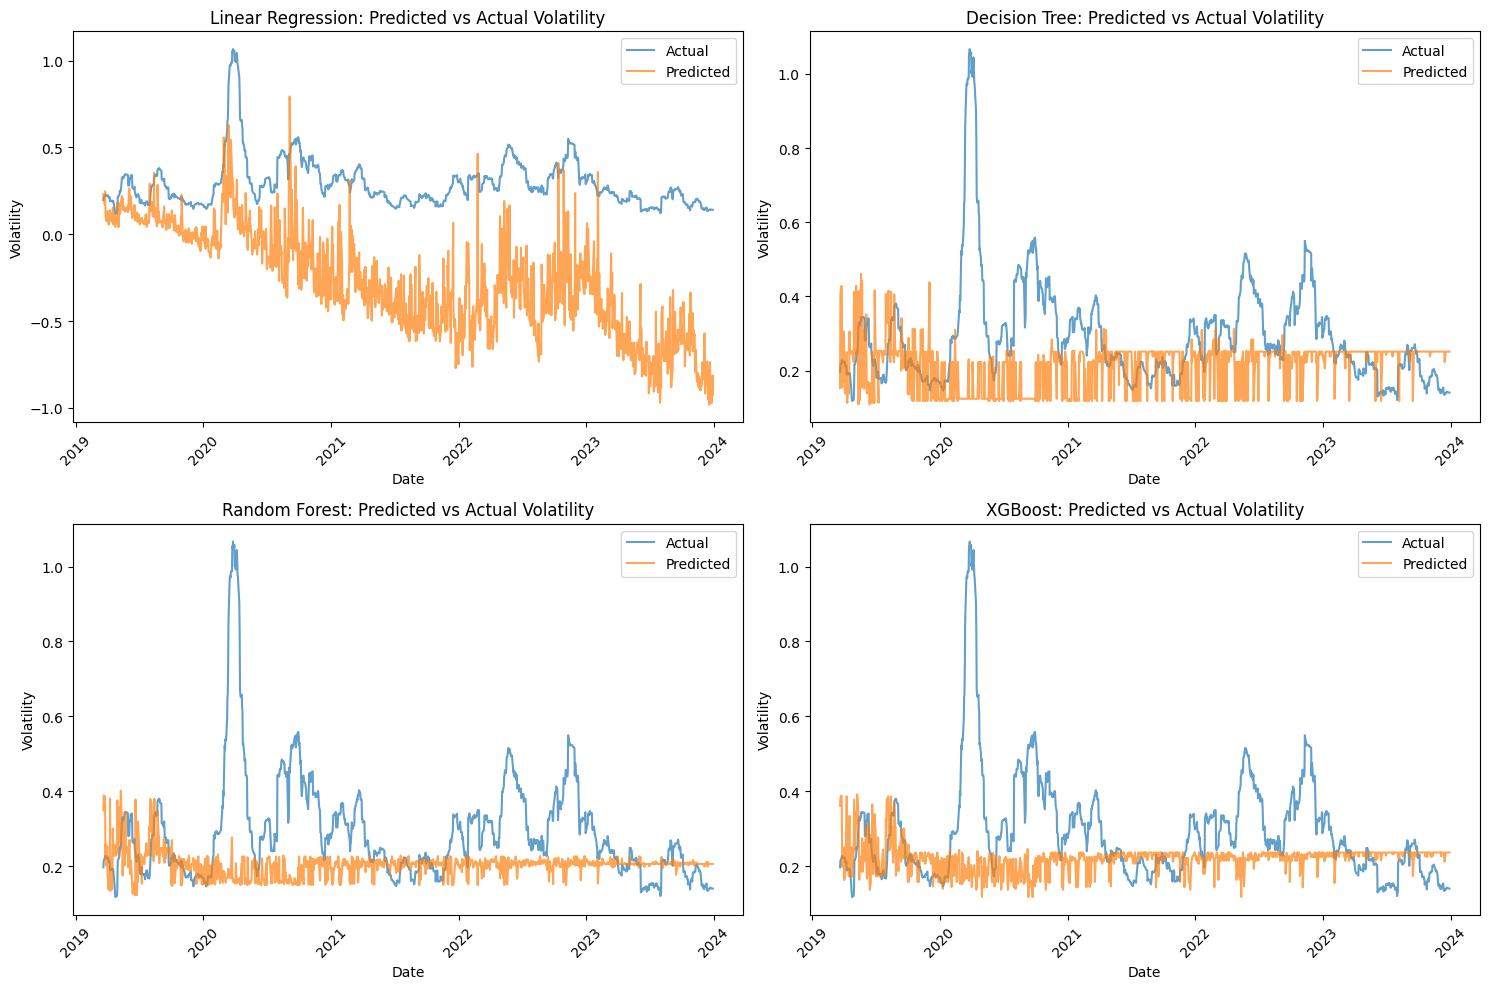

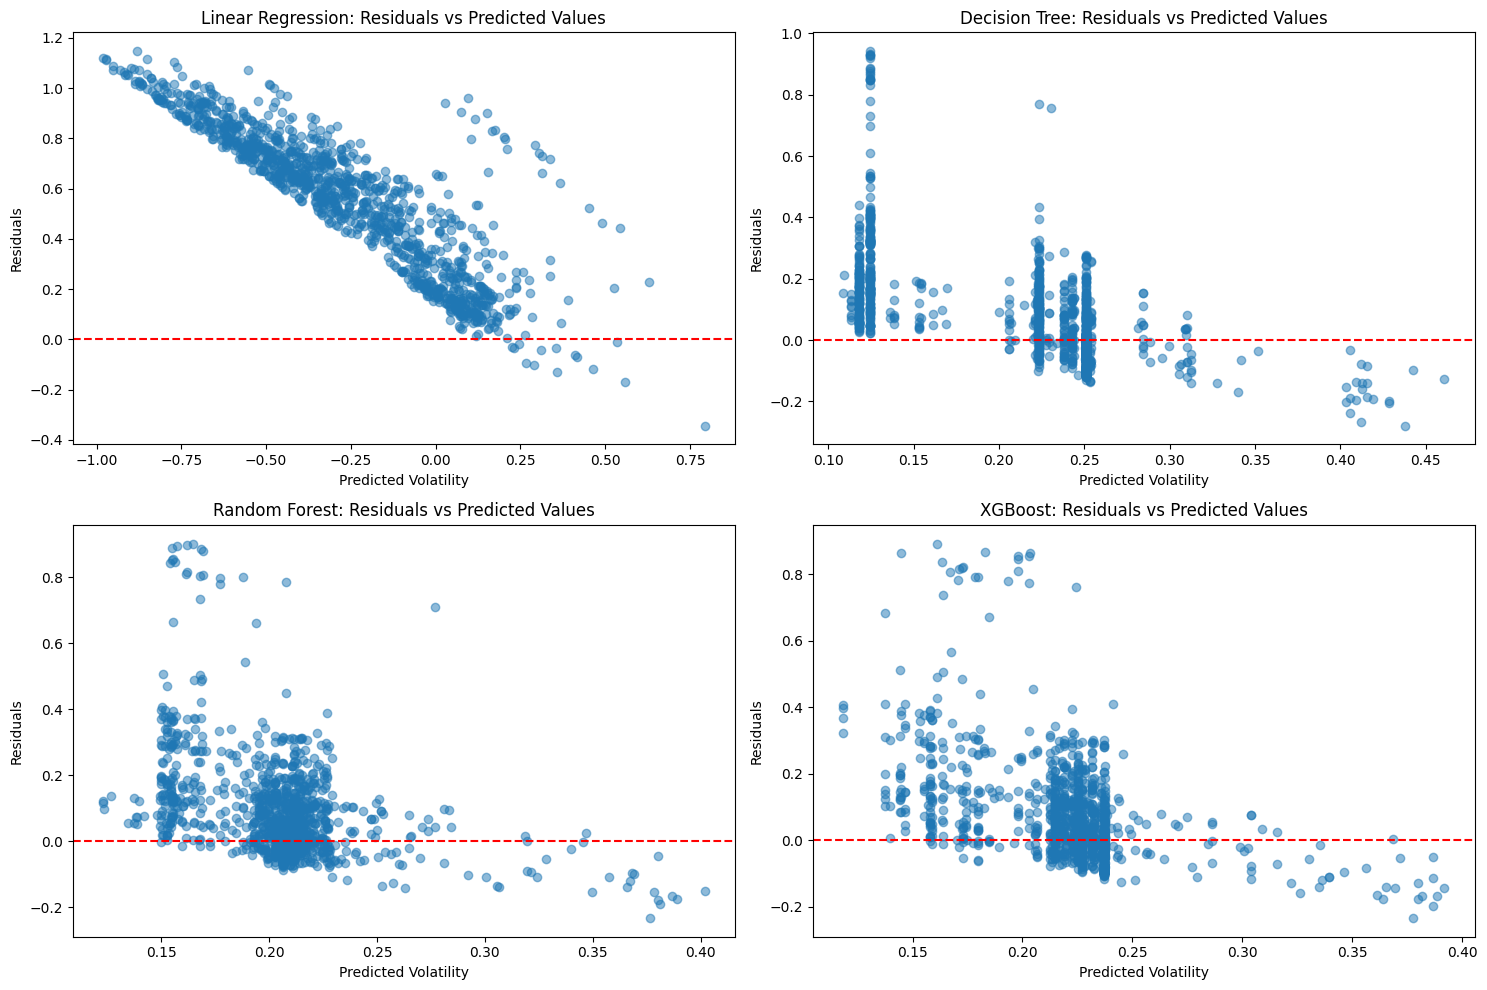

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import shap

# 1. Load and prepare the stock data
def load_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    data['Returns'] = data['Adj Close'].pct_change()
    data['Volatility'] = data['Returns'].rolling(window=21).std() * np.sqrt(252)
    return data.dropna()

# Load Apple stock data
apple_data = load_stock_data('AAPL', '2000-01-01', '2024-01-01')

# Prepare features and target
X = apple_data[['Open', 'High', 'Low', 'Volume']]
y = apple_data['Volatility']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 2. Permutation Method
def permutation_importance_analysis(model, X, y):
    perm_importance = permutation_importance(model, X, y, n_repeats=10, random_state=42)
    return pd.DataFrame({
        'feature': X.columns,
        'importance': perm_importance.importances_mean
    }).sort_values('importance', ascending=False)

# 3. SHAP Method
def shap_analysis(model, X):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)
    return pd.DataFrame({
        'feature': X.columns,
        'importance': np.abs(shap_values).mean(axis=0)
    }).sort_values('importance', ascending=False)

# 4. Compare and interpret results
def compare_feature_importance(perm_importance, shap_importance):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.bar(perm_importance['feature'], perm_importance['importance'])
    plt.title("Permutation Importance")
    plt.xticks(rotation=45)
    
    plt.subplot(1, 2, 2)
    plt.bar(shap_importance['feature'], shap_importance['importance'])
    plt.title("SHAP Importance")
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# 5. Implement and compare ML models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

results = {}
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}
    predictions[name] = y_pred
    
    if name == 'Random Forest':  # Use Random Forest for importance analysis
        perm_importance = permutation_importance_analysis(model, X_test, y_test)
        shap_importance = shap_analysis(model, X_test)
        compare_feature_importance(perm_importance, shap_importance)

# Print model performance results
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  MSE: {metrics['MSE']:.4f}")
    print(f"  R2: {metrics['R2']:.4f}")



# Interpret the Random Forest model (as an example)
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.title("Random Forest Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Random Forest Feature Importance:")
print(feature_importance)

# 6. Prediction Visualization
plt.figure(figsize=(15, 10))
for i, (name, y_pred) in enumerate(predictions.items(), 1):
    plt.subplot(2, 2, i)
    plt.plot(y_test.index, y_test.values, label='Actual', alpha=0.7)
    plt.plot(y_test.index, y_pred, label='Predicted', alpha=0.7)
    plt.title(f"{name}: Predicted vs Actual Volatility")
    plt.xlabel("Date")
    plt.ylabel("Volatility")
    plt.legend()
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 7. Residual Analysis
plt.figure(figsize=(15, 10))
for i, (name, y_pred) in enumerate(predictions.items(), 1):
    residuals = y_test - y_pred
    plt.subplot(2, 2, i)
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.title(f"{name}: Residuals vs Predicted Values")
    plt.xlabel("Predicted Volatility")
    plt.ylabel("Residuals")
    plt.axhline(y=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()


Investigating negative permutation importance:
Base model score: -0.5391052595117276

Feature importances and their effect on model score:
Open:
  Mean importance: -0.030316540137089974
  Effect on score: -0.5087887193746377
High:
  Mean importance: -0.04011135379492579
  Effect on score: -0.4989939057168018
Low:
  Mean importance: -0.05105731081598539
  Effect on score: -0.4880479486957422
Volume:
  Mean importance: -0.07982221819052442
  Effect on score: -0.4592830413212032

Performing Time Series Analysis:


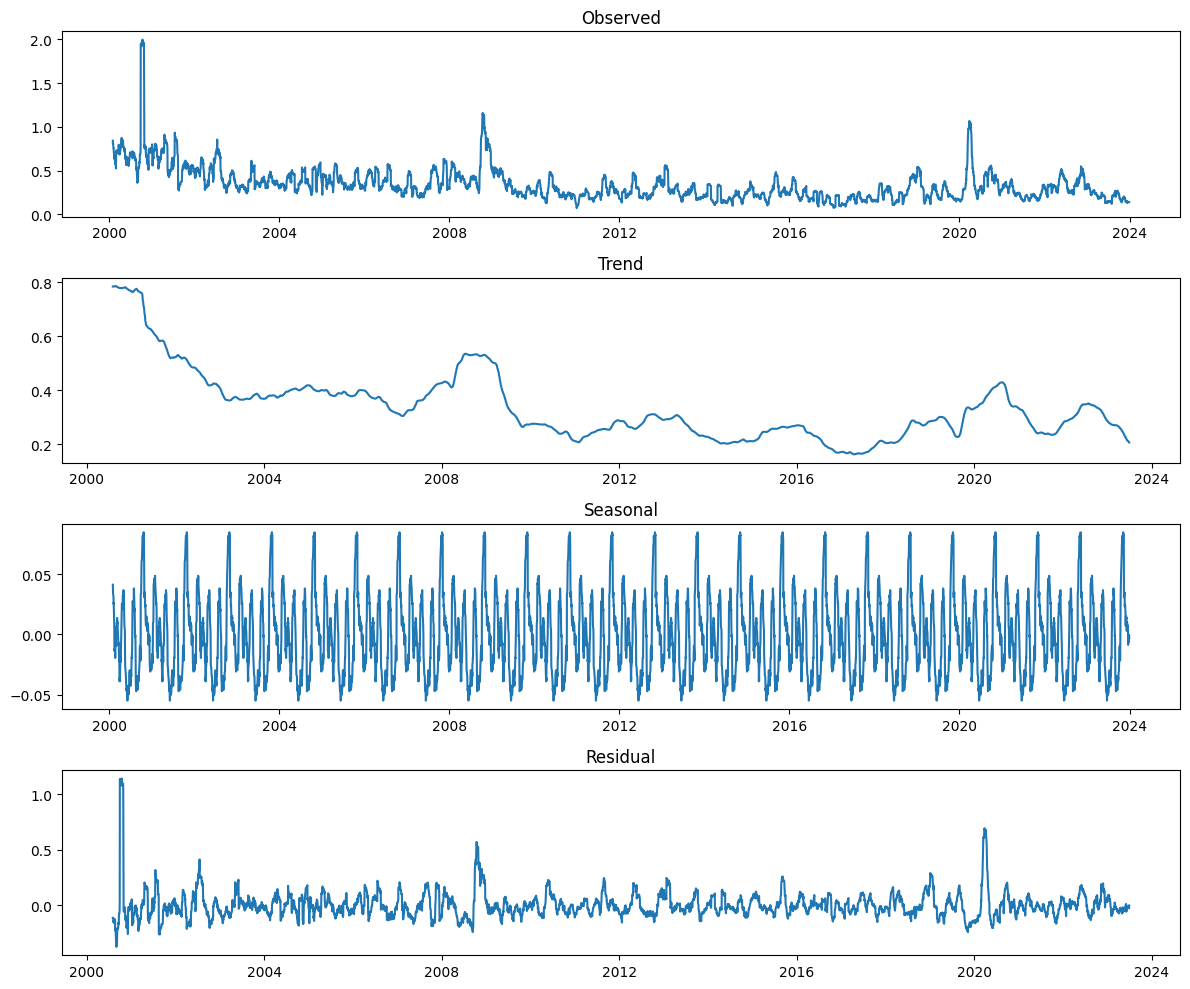

c:\Users\moussaab\anaconda3\envs\pythonProject\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\moussaab\anaconda3\envs\pythonProject\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def investigate_permutation(model, X, y):
    base_score = model.score(X, y)
    perm_importance = permutation_importance(model, X, y, n_repeats=10, random_state=42)
    
    print(f"Base model score: {base_score}")
    print("\nFeature importances and their effect on model score:")
    for i, feature in enumerate(X.columns):
        print(f"{feature}:")
        print(f"  Mean importance: {perm_importance.importances_mean[i]}")
        print(f"  Effect on score: {base_score - perm_importance.importances_mean[i]}")

print("\nInvestigating negative permutation importance:")
investigate_permutation(models['Random Forest'], X_test, y_test)

# Time Series Analysis
def time_series_analysis(data):
    # Decompose the time series
    from statsmodels.tsa.seasonal import seasonal_decompose
    decomposition = seasonal_decompose(data['Volatility'], model='additive', period=252)
    
    plt.figure(figsize=(12, 10))
    plt.subplot(411)
    plt.plot(decomposition.observed)
    plt.title('Observed')
    plt.subplot(412)
    plt.plot(decomposition.trend)
    plt.title('Trend')
    plt.subplot(413)
    plt.plot(decomposition.seasonal)
    plt.title('Seasonal')
    plt.subplot(414)
    plt.plot(decomposition.resid)
    plt.title('Residual')
    plt.tight_layout()
    plt.show()
    
    # SARIMA model
    model = SARIMAX(data['Volatility'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 252))
    results = model.fit()
    print(results.summary())
    
    # Forecast
    forecast = results.get_forecast(steps=252)
    forecast_ci = forecast.conf_int()
    
    plt.figure(figsize=(12, 6))
    plt.plot(data.index[-500:], data['Volatility'][-500:], label='Observed')
    plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, color='r', label='Forecast')
    plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
    plt.title('SARIMA Forecast of Volatility')
    plt.legend()
    plt.show()

print("\nPerforming Time Series Analysis:")
time_series_analysis(apple_data)

# Prediction Visualization
plt.figure(figsize=(15, 10))
for i, (name, y_pred) in enumerate(predictions.items(), 1):
    plt.subplot(2, 2, i)
    plt.plot(y_test.index, y_test.values, label='Actual', alpha=0.7)
    plt.plot(y_test.index, y_pred, label='Predicted', alpha=0.7)
    plt.title(f"{name}: Predicted vs Actual Volatility")
    plt.xlabel("Date")
    plt.ylabel("Volatility")
    plt.legend()
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()





